In [189]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

#### Iloc

In [190]:
df.iloc[0:10, 0]

0    Senior Data Engineer
1            Data Analyst
2           Data Engineer
3           Data Engineer
4           Data Engineer
5           Data Engineer
6    Senior Data Engineer
7           Data Engineer
8        Business Analyst
9          Data Scientist
Name: job_title_short, dtype: object

In [191]:
df.loc[:, 'salary_rate':'salary_hour_avg'].dropna(subset='salary_rate')

,salary_rate,salary_year_avg,salary_hour_avg
28,year,109500.0,NaN
43,hour,NaN,97.5
51,hour,NaN,72.5
77,year,140000.0,NaN
92,year,120000.0,NaN
...,...,...,...
785624,year,139216.0,NaN
785641,year,150000.0,NaN
785648,year,221875.0,NaN
785682,year,157500.0,NaN


In [192]:
median_sal_yearly = df['salary_year_avg'].median()

In [193]:
median_sal_hourly = df['salary_hour_avg'].median()

#### fillna

In [194]:
df_filled = df

df_filled['salary_hour_avg'] = df_filled['salary_hour_avg'].fillna(median_sal_hourly)
df_filled['salary_year_avg'] = df_filled['salary_year_avg'].fillna(median_sal_yearly)

df_filled.loc[ : 10, 'salary_year_avg':'salary_hour_avg']

,salary_year_avg,salary_hour_avg
0,115000.0,45.98
1,115000.0,45.98
2,115000.0,45.98
3,115000.0,45.98
4,115000.0,45.98
5,115000.0,45.98
6,115000.0,45.98
7,115000.0,45.98
8,115000.0,45.98
9,115000.0,45.98


#### drop duplicates

In [195]:
df_unique = df_filled

df_unique = df_unique.drop_duplicates()

In [196]:
print('Length of the original df: ', len(df_filled))
print('Length of the unique df: ', len(df_unique))
print('Rows dropped: ', len(df_filled) - len(df_unique))

Length of the original df:  785741
Length of the unique df:  785640
Rows dropped:  101


In [197]:
df_unique = df_unique.drop_duplicates(subset=['job_title', 'company_name'])
print('Length of the original df: ', len(df_filled))
print('Length of the unique df: ', len(df_unique))
print('Rows dropped: ', len(df_filled) - len(df_unique))

Length of the original df:  785741
Length of the unique df:  508042
Rows dropped:  277699


#### Sample()

In [198]:
df.sample(10, random_state=42)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
502901,Senior Data Engineer,Senior Data Engineer,"St Paul, MN",via BeBee,Full-time,False,"Florida, United States",2023-12-17 11:09:06,False,False,United States,None,115000.0,45.98,ManpowerGroup,"['sql', 'azure', 'git']","{'cloud': ['azure'], 'other': ['git'], 'progra..."
406337,Senior Data Scientist,Senior Analytics Engineer,"London, UK",via LinkedIn,Full-time,False,United Kingdom,2023-10-06 16:09:56,False,False,United Kingdom,None,115000.0,45.98,Harnham,"['sql', 'python', 'bigquery', 'snowflake', 'lo...","{'analyst_tools': ['looker'], 'cloud': ['bigqu..."
659951,Data Engineer,Data Engineer,"Newcastle upon Tyne, UK",via Indeed,Full-time,False,United Kingdom,2023-09-06 10:11:25,True,False,United Kingdom,None,115000.0,45.98,Morgan King,None,None
541593,Data Analyst,Data Analyst,Malta,via Trabajo.org,Full-time,False,Malta,2023-02-14 21:14:18,True,False,Malta,None,115000.0,45.98,Konnekt,['jira'],{'async': ['jira']}
425158,Senior Data Engineer,Senior Data Engineer. Job in Amsterdam NBC4i Jobs,"Amsterdam, Netherlands",via NBC4i Jobs,Full-time,False,Netherlands,2023-06-19 16:34:30,True,False,Netherlands,None,115000.0,45.98,Independent Recruiters,['python'],{'programming': ['python']}
183426,Data Analyst,Data Analyst,Singapore,via Singapore | JobsDB,Full-time,False,Singapore,2023-11-09 16:07:57,False,False,Singapore,None,115000.0,45.98,FLEXOSENSE PTE. LTD.,"['r', 'python', 'java', 'sql', 'sql server', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
287790,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-07-14 17:02:23,True,False,United States,None,115000.0,45.98,Iris Software Inc.,"['sql', 'hadoop', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['ha..."
541983,Data Analyst,"Data Analyst, Cloud Systems Jobs","Chantilly, VA",via Clearance Jobs,Full-time,False,Georgia,2023-06-15 19:44:34,False,False,United States,None,115000.0,45.98,SAIC,"['sql', 'r', 'matlab', 'python', 'oracle', 'aw...","{'analyst_tools': ['power bi', 'tableau', 'qli..."
416896,Data Scientist,Alternant Actuariat & Data Science H/F,France,via LinkedIn,Full-time,False,France,2023-09-22 16:47:24,False,False,France,None,115000.0,45.98,KPMG France,None,None
780907,Data Engineer,"Data Engineer with Fivetran,Qlik Must","Mexico City, CDMX, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-16 06:19:09,False,False,Mexico,None,115000.0,45.98,CORUS Consulting,"['oracle', 'snowflake', 'aws', 'azure', 'alter...","{'analyst_tools': ['alteryx'], 'cloud': ['orac..."


#### copy()

In [199]:
dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()

In [200]:
df_altered = df_original.copy()

#### pivot table

In [201]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [202]:
df.pivot_table(index='job_title_short', aggfunc='size')

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [203]:
df.groupby('job_title_short').size()

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [204]:
df.pivot_table(values='salary_year_avg' ,index='job_title_short', aggfunc='median')

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [205]:
df.groupby('job_title_short')['salary_year_avg'].median()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Data Engineer                125000.0
Data Scientist               127500.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Software Engineer             99150.0
Name: salary_year_avg, dtype: float64

In [206]:
df.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short', aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [207]:
top_countries = df['job_country'].value_counts().head(6).index
top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

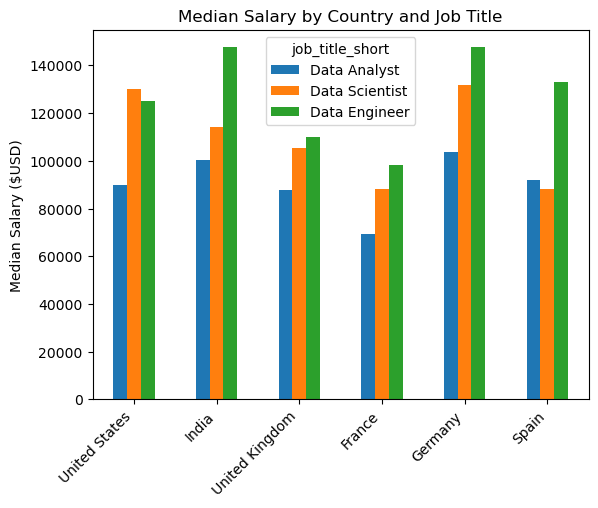

In [208]:
df_job_country_salaries = df.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short', aggfunc='median')
df_job_country_salaries = df_job_country_salaries.loc[top_countries]

df_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_job_country_salaries = df_job_country_salaries[df_job_titles]
df_job_country_salaries.plot(kind='bar')
plt.ylabel('Median Salary ($USD)')
plt.xlabel('')
plt.title('Median Salary by Country and Job Title')
plt.xticks(rotation=45, ha = 'right')
plt.show()


#### reset_index()

In [209]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [210]:
df_usa = df[df['job_country']=='United States']
df_usa.reset_index(inplace=True)
df_usa

,index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
2,5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
3,6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
4,9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206287,785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
206288,785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
206289,785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"
206290,785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


#### set_index()

In [211]:
df_usa.set_index('index', inplace=True)
df_usa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"


#### sort_index()

In [212]:
median_pivot = df_usa.pivot_table(values='salary_year_avg', index='job_title_short', aggfunc=['min', 'max', 'median'])

In [213]:
median_pivot

,min,max,median
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Business Analyst,35000.0,387460.0,90000.0
Cloud Engineer,42000.0,221844.0,116100.0
Data Analyst,25000.0,375000.0,90000.0
Data Engineer,23496.0,525000.0,125000.0
Data Scientist,30000.0,960000.0,130000.0
Machine Learning Engineer,44408.5,315000.0,150000.0
Senior Data Analyst,35360.0,425000.0,110000.0
Senior Data Engineer,45000.0,375000.0,150000.0


In [214]:
median_pivot.sort_values(by=('median', 'salary_year_avg'), ascending=False)

,min,max,median
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Senior Data Scientist,55000.0,475000.0,155000.0
Machine Learning Engineer,44408.5,315000.0,150000.0
Senior Data Engineer,45000.0,375000.0,150000.0
Data Scientist,30000.0,960000.0,130000.0
Software Engineer,48982.0,375000.0,130000.0
Data Engineer,23496.0,525000.0,125000.0
Cloud Engineer,42000.0,221844.0,116100.0
Senior Data Analyst,35360.0,425000.0,110000.0


In [215]:
median_pivot.sort_index(inplace=True)
median_pivot

,min,max,median
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Business Analyst,35000.0,387460.0,90000.0
Cloud Engineer,42000.0,221844.0,116100.0
Data Analyst,25000.0,375000.0,90000.0
Data Engineer,23496.0,525000.0,125000.0
Data Scientist,30000.0,960000.0,130000.0
Machine Learning Engineer,44408.5,315000.0,150000.0
Senior Data Analyst,35360.0,425000.0,110000.0
Senior Data Engineer,45000.0,375000.0,150000.0


#### Exercise

In [216]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [241]:
df_US = df[df['job_country']=='United States'].copy()
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US_pivot = df_US.pivot_table(index = 'job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot.reset_index(inplace=True)
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot.sort_values('month_no', inplace=True)
df_US_pivot.set_index('job_posted_month', inplace=True)
df_US_pivot.drop(columns='month_no', inplace=True)
df_US_pivot


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


<Axes: xlabel='job_posted_month'>

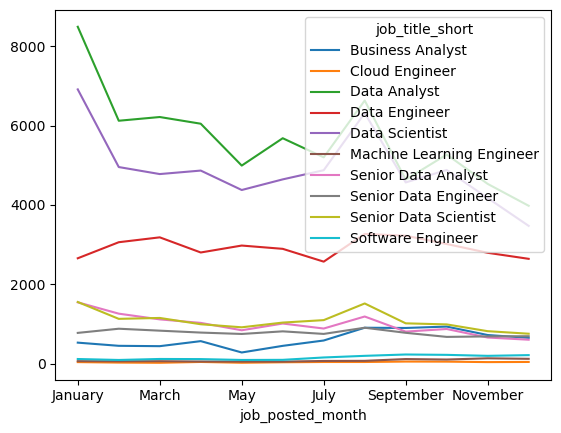

In [222]:
df_US_pivot.plot(kind='line')

In [228]:
top_3 = df_US['job_title_short'].value_counts().head(3)
top_3 = top_3.index.to_list()
top_3

['Data Analyst', 'Data Scientist', 'Data Engineer']

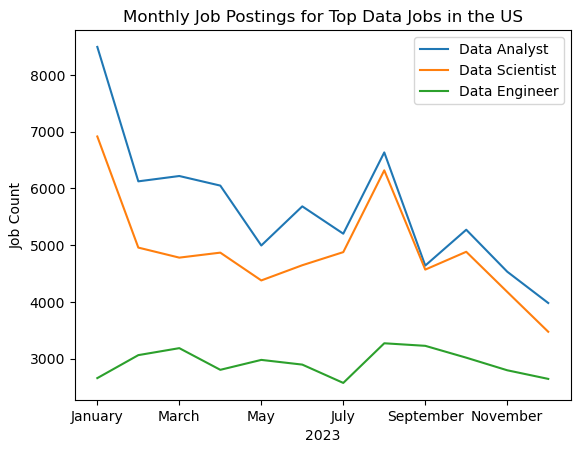

In [239]:
df_US_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

In [244]:
df_US_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')
df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [247]:
df_US_merged = df_US_pivot.merge(df_US_software_pivot, on='job_posted_month')

In [253]:
top_5 = df_US_merged.sum().sort_values(ascending=False).head(5).index.to_list()
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

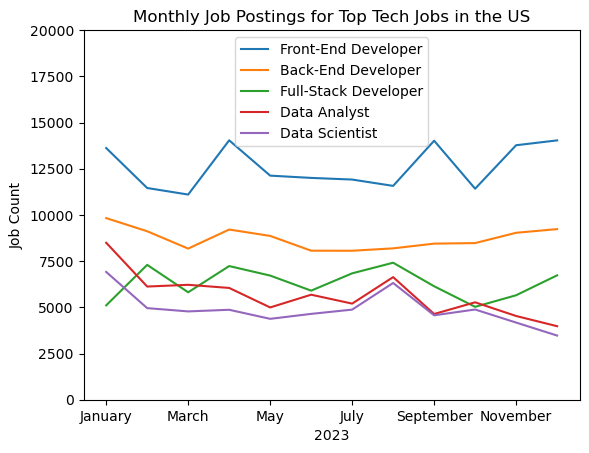

In [255]:
df_US_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0, 20000)
plt.legend()
plt.show()

In [257]:
df_US_merged.to_csv('merged_jobs.csv')

In [258]:
pd.read_csv('merged_jobs.csv')

,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
0,January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
1,February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
2,March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
3,April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
4,May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
5,June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
6,July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
7,August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
8,September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094
9,October,932,48,5271,3015,4882,101,871,672,987,219,11419,8476,5026,4389


In [260]:
df_US_merged.to_excel('merged_jobs.xlsx')

#### apply()

In [280]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [268]:
df_salary = df[pd.notna(df['salary_year_avg'])].copy()

def proejcted_salary(salary):
    return salary * 1.03

df_salary['salary_year_inflated'] = df_salary['salary_year_avg'].apply(proejcted_salary)

df_salary[['salary_year_avg', 'salary_year_inflated']]

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [270]:
df_salary['salary_year_inflated'] = df_salary['salary_year_avg'].apply(lambda salary: salary * 1.03)

df_salary[['salary_year_avg', 'salary_year_inflated']]

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [283]:
def proejcted_salary(row):
    if "Senior" in row['job_title_short']:
        return 1.05 * row['salary_year_avg']
    else:
        return 1.03 * row['salary_year_avg']
    
df_salary['salary_year_inflated'] = df_salary.apply(proejcted_salary, axis = 1)

df_salary[['job_title_short', 'salary_year_avg', 'salary_year_inflated']]

,job_title_short,salary_year_avg,salary_year_inflated
28,Data Scientist,109500.0,112785.00
77,Data Engineer,140000.0,144200.00
92,Data Engineer,120000.0,123600.00
100,Data Scientist,228222.0,235068.66
109,Data Analyst,89000.0,91670.00
...,...,...,...
785624,Data Engineer,139216.0,143392.48
785641,Data Engineer,150000.0,154500.00
785648,Data Scientist,221875.0,228531.25
785682,Data Scientist,157500.0,162225.00


#### explode()

In [284]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='job_skills'>

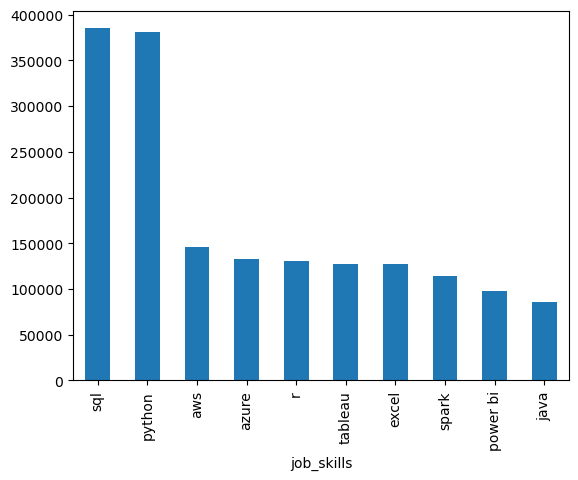

In [294]:
df[['job_title_short', 'job_skills']].head(5)

df_exploded = df.explode('job_skills')
df_exploded['job_skills'].value_counts().head(10).plot(kind = 'bar')

In [299]:
df_exploded = df.explode('job_skills')
skills_count = df_exploded.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = skills_count.reset_index(name='skill_count').sort_values(by='skill_count', ascending=False)
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


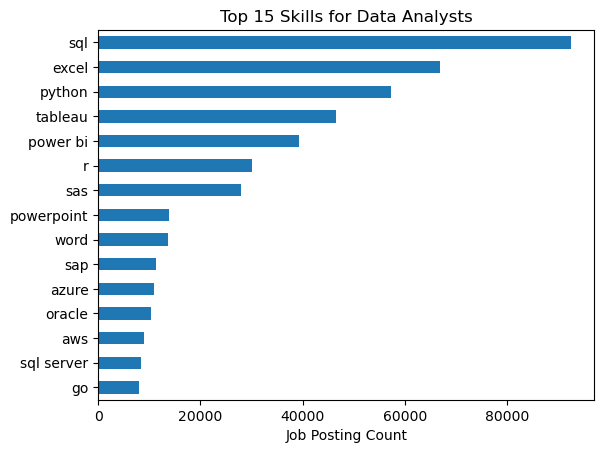

In [311]:
job_title = 'Data Analyst'
top_skills = 15

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skill_final.plot(kind = 'barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

#### Exercise - Invetigate Trending Skills

In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

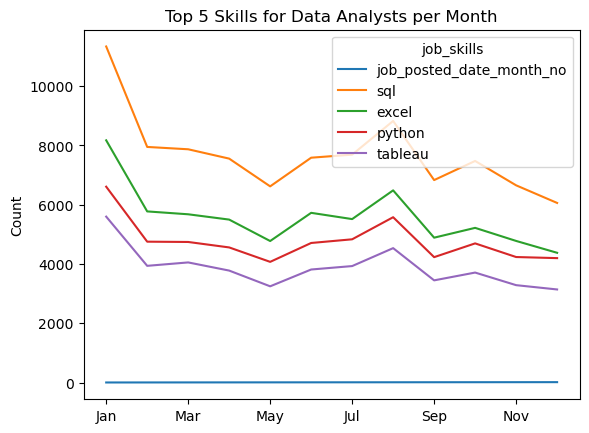

In [347]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

df_DA['job_posted_date_month_no'] = df_DA['job_posted_date'].dt.month

df_DA_exploded = df_DA.explode('job_skills')
df_DA_pivot = df_DA_exploded.pivot_table(index='job_posted_date_month_no', columns='job_skills', aggfunc = 'size', fill_value=0)

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_date_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot.drop(columns='job_posted_date_month_no')


df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 Skills for Data Analysts per Month')
plt.xlabel('')
plt.ylabel('Count')
plt.show()